This part of the notebook is devoted to the analysis of Bayesian optimization of one-dimensional functions from a file Functions.py. For this work is used library GPyOpt. You can install it from a terminal : pip install gpyopt. I consider Bayesian optimization for two cases: optimizing the function without noise and optimizing the same function, but with noise that is dependent from the coordinate. And then I compare the results.


In [497]:
%pylab inline  
import GPy
import GPyOpt

import  Functions
from Functions import *


Populating the interactive namespace from numpy and matplotlib


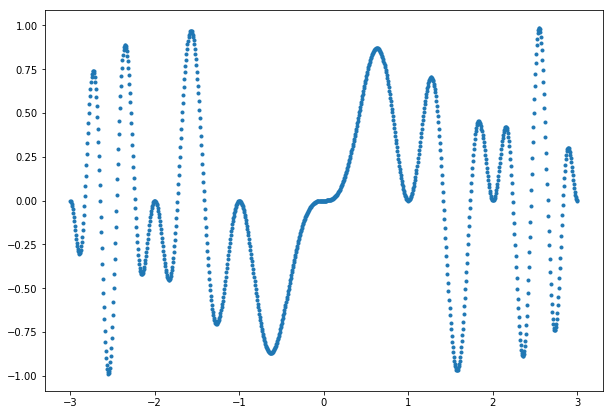

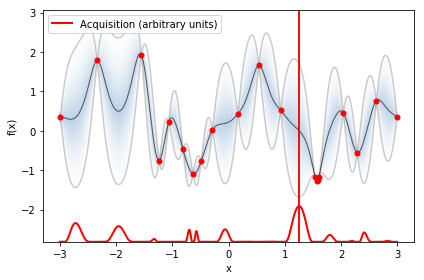

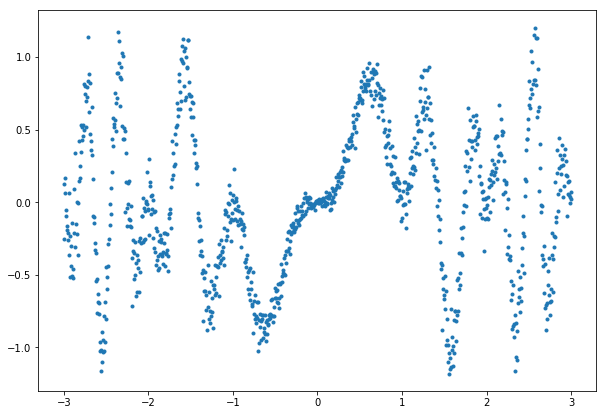

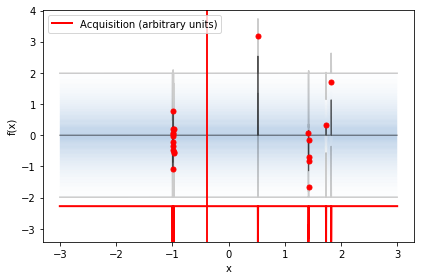

michalewicz  x_opt_without_noise =  [1.57311985] , x_opt_with_noise =  [1.42382682] , diff =  [0.14929304]
michalewicz  y_opt_without_noise =  -0.9706591812411488 , y_opt_with_noise =  -0.3951338715303156 , diff =  0.5755253097108333


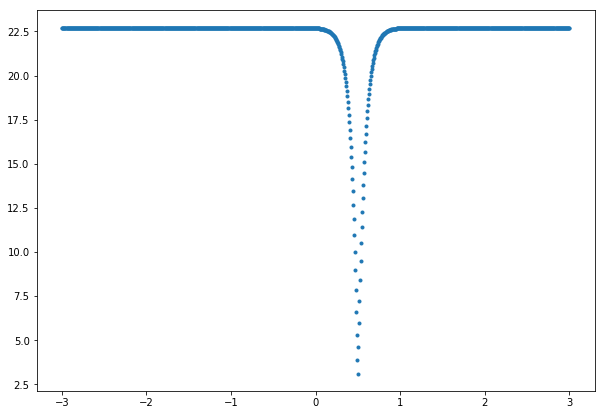

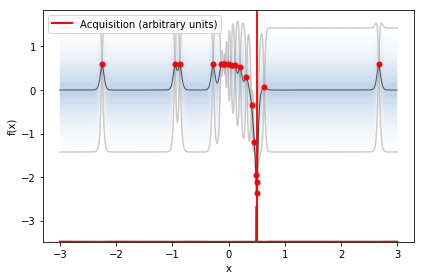

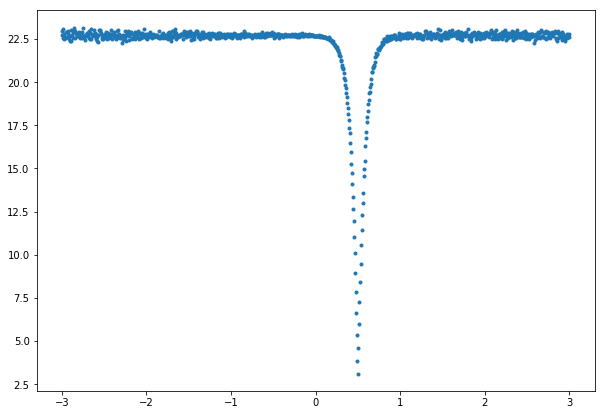

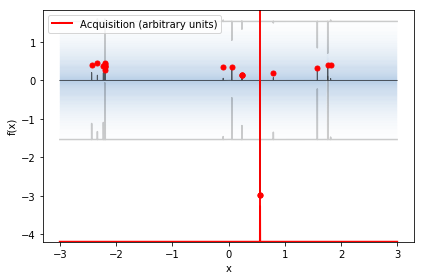

ackley1  x_opt_without_noise =  [0.50332588] , x_opt_with_noise =  [0.5599658] , diff =  [0.05663992]
ackley1  y_opt_without_noise =  3.571411390766397 , y_opt_with_noise =  13.582407573250316 , diff =  10.01099618248392


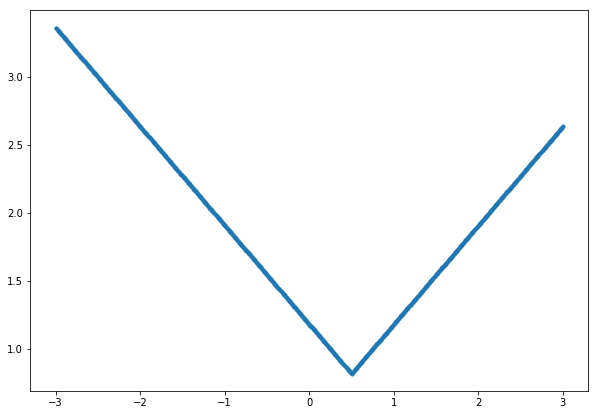

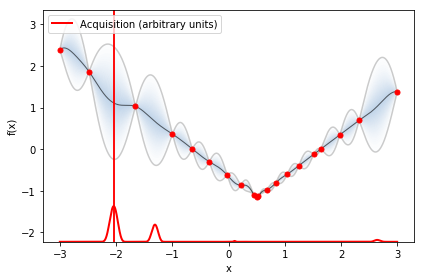

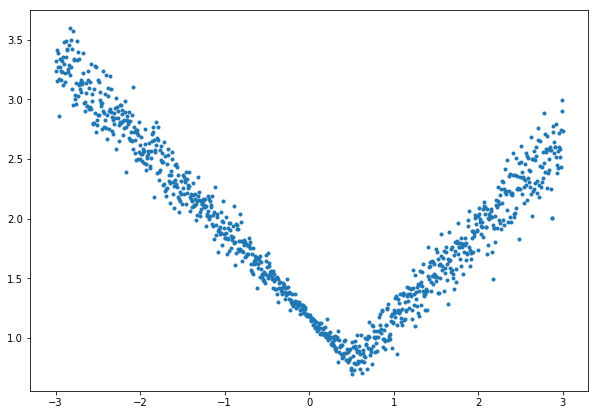

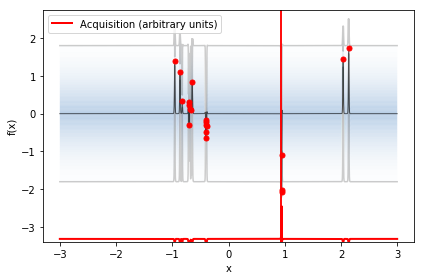

gsobol  x_opt_without_noise =  [0.50119434] , x_opt_with_noise =  [0.94411437] , diff =  [0.44292003]
gsobol  y_opt_without_noise =  0.8190504296604534 , y_opt_with_noise =  1.035561908076377 , diff =  0.21651147841592355


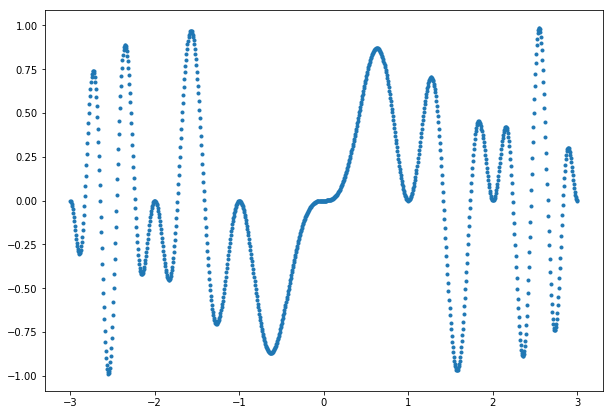

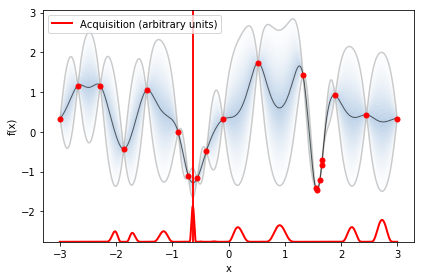

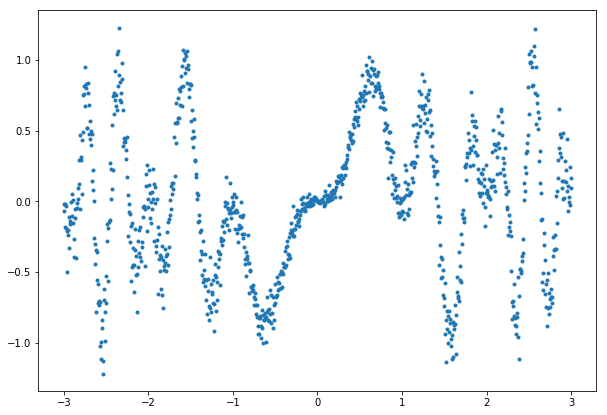

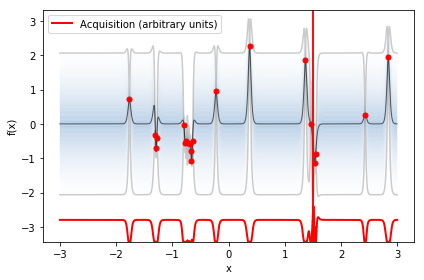

michalewicz5  x_opt_without_noise =  [1.5755495] , x_opt_with_noise =  [1.53046319] , diff =  [0.04508631]
michalewicz5  y_opt_without_noise =  -0.970472705615033 , y_opt_with_noise =  -0.9683130427333548 , diff =  0.002159662881678126


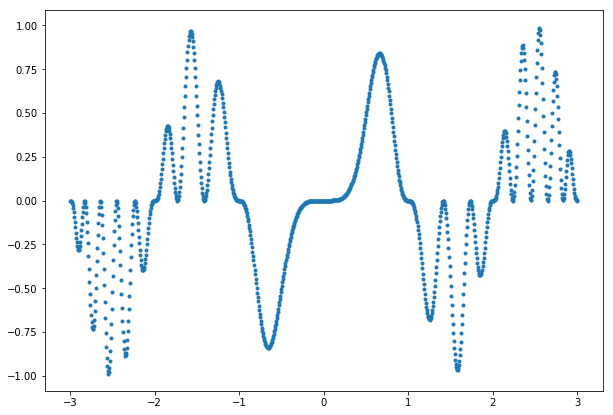

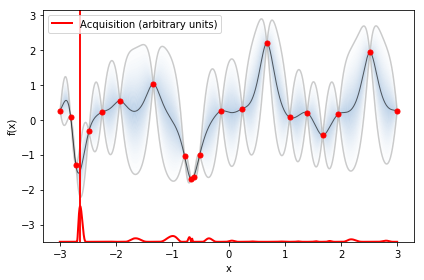

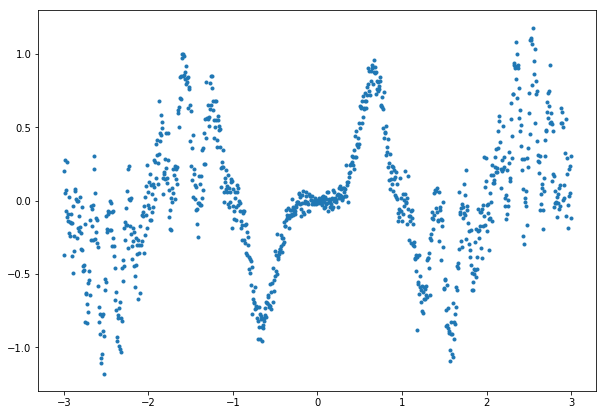

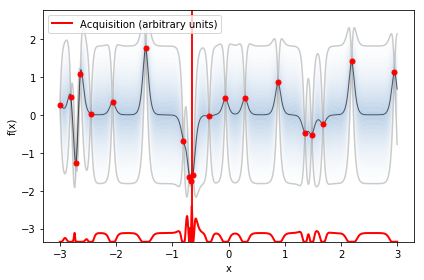

sqmichalewicz5  x_opt_without_noise =  [-0.66290072] , x_opt_with_noise =  [-0.67079122] , diff =  [0.00789051]
sqmichalewicz5  y_opt_without_noise =  -0.8406970938301284 , y_opt_with_noise =  -0.8836398237360741 , diff =  0.04294272990594572


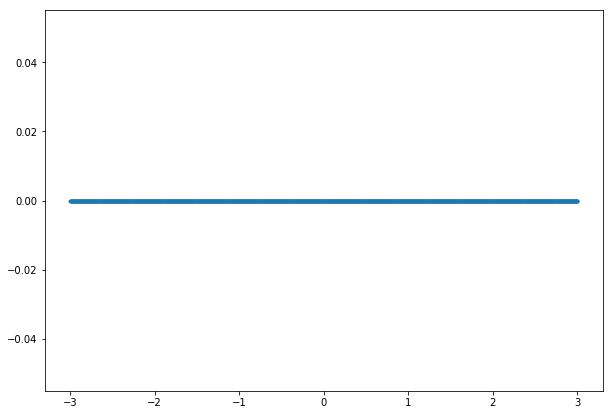

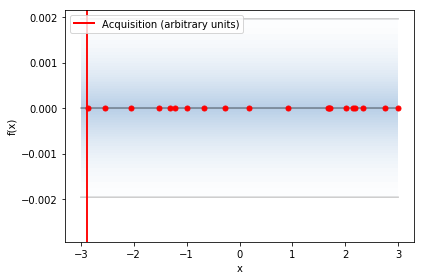

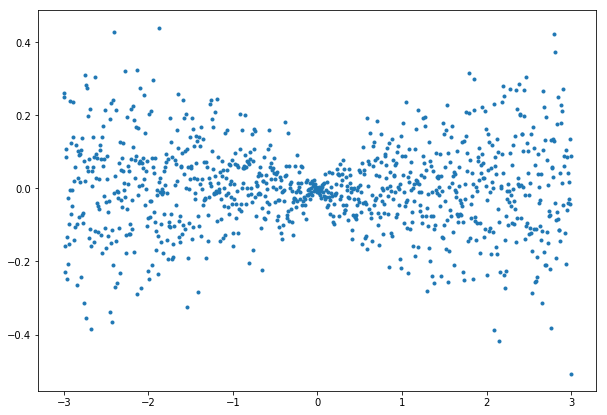

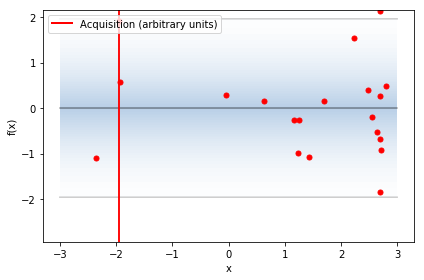

rosenbrock5  x_opt_without_noise =  [2.15236101] , x_opt_with_noise =  [2.69308655] , diff =  [0.54072554]
rosenbrock5  y_opt_without_noise =  0.0 , y_opt_with_noise =  -0.23881756424918166 , diff =  0.23881756424918166


In [499]:
#list of one-dimensional functions from Functions.py
function_names = ['michalewicz', 'ackley1', 'gsobol', 'michalewicz5', 'sqmichalewicz5', 'rosenbrock5']

#required set of constants
N = 1000
X = np.linspace(-3, 3, N).reshape (- 1, 1)

bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (-3,3)}]  # problem constraints 

max_iter = 15 # evaluation budget
max_time = 60     # time budget 
eps      = 10e-6  # Minimum allows distance between the las two observations


for name in function_names:
    #first function - without noise    
    def f(X):
        return functionDoESpecial (X, name)
    
    y = f(X)
    pyplot.figure(figsize=(10, 7))
    pyplot.plot(X, y, '.')

    bayes_opt_without_noise = GPyOpt.methods.BayesianOptimization(f=f,# function to optimize       
                                                domain=bounds, # box-constraints of the problem
                                                acquisition_type='EI',
                                                 exact_feval = True) # Selects the Expected improvement

    bayes_opt_without_noise.run_optimization(max_iter, max_time, eps)        
    bayes_opt_without_noise.plot_acquisition()


    
    
    #second function - with noise   
    def f(X):
        # target function  + heteroscadastic noise
        return functionDoESpecial (X, name) + \
        0.1 * np.random.multivariate_normal(np.zeros(X.reshape(-1, ).shape[0]), np.diag(X.reshape (-1, )), 1)[0]
    
 
    y = f(X)
    pyplot.figure(figsize=(10, 7))
    pyplot.plot(X, y, '.')
    
    

    bayes_opt_with_noise = GPyOpt.methods.BayesianOptimization(f=f,# function to optimize       
                                                domain=bounds, # box-constraints of the problem
                                                acquisition_type='EI',
                                                 exact_feval = True) # Selects the Expected improvement

    bayes_opt_with_noise.run_optimization(max_iter, max_time, eps)        
    bayes_opt_with_noise.plot_acquisition()
    
    
    #compare results
    diff_x = np.abs (bayes_opt_without_noise.x_opt - bayes_opt_with_noise.x_opt)
    diff_y = np.abs (bayes_opt_without_noise.fx_opt - bayes_opt_with_noise.fx_opt)
    print name, " x_opt_without_noise = ", bayes_opt_without_noise.x_opt, ", x_opt_with_noise = ", bayes_opt_with_noise.x_opt, ", diff = ", diff_x
    print name, " y_opt_without_noise = ", bayes_opt_without_noise.fx_opt, ", y_opt_with_noise = ", bayes_opt_with_noise.fx_opt, ", diff = ", diff_y
       